In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [3]:
train = pd.read_csv('processed_train_data.csv')
pd.set_option('display.max_columns', None)
train.head()

,Id,customer_id,interest_rate,name,country,date_of_birth,date,atm_transfer_in,atm_transfer_out,bank_transfer_in,bank_transfer_out,crypto_in,crypto_out,bank_transfer_in_volume,bank_transfer_out_volume,crypto_in_volume,crypto_out_volume,complaints,tenure,from_competitor,churn_due_to_fraud,model_predicted_fraud,n_touchpoints,has_whatsapp,has_email,has_phone,has_appointment,avg_csat_score,address_type,city,address_country,primary_job,job_specialization,month,year
0,1,1,3.5,Yolanda Parker,Lithuania,1954-07-10,2008-01-17,0,0,17476,3911,56,13,7380.083338,5844.193394,393.145010,220.900654,0,0,False,False,False,0,False,False,False,False,0.0,Suite,Michaelburgh,Lithuania,Amenity horticulturist,NaN,1,2008
1,6,1,3.5,Yolanda Parker,Lithuania,1954-07-10,2008-01-18,0,0,19680,3358,46,14,7504.751064,4986.370246,390.005729,221.147296,0,1,False,False,False,0,False,False,False,False,0.0,Suite,Michaelburgh,Lithuania,Amenity horticulturist,NaN,1,2008
2,16,1,3.5,Yolanda Parker,Lithuania,1954-07-10,2008-01-19,0,0,17958,4113,48,13,6720.934090,7451.373471,393.209108,260.510535,0,2,False,False,False,0,False,False,False,False,0.0,Suite,Michaelburgh,Lithuania,Amenity horticulturist,NaN,1,2008
3,31,1,3.5,Yolanda Parker,Lithuania,1954-07-10,2008-01-20,0,0,22772,3750,49,15,6976.218992,6548.352211,394.078294,203.214128,0,3,False,False,False,0,False,False,False,False,0.0,Suite,Michaelburgh,Lithuania,Amenity horticulturist,NaN,1,2008
4,50,1,3.5,Yolanda Parker,Lithuania,1954-07-10,2008-01-21,0,0,23610,4005,60,12,6453.651629,6129.342716,395.174604,207.894467,0,4,False,False,False,1,False,False,False,False,0.0,Suite,Michaelburgh,Lithuania,Amenity horticulturist,NaN,1,2008


In [4]:
train['job_specialization'].value_counts()

job_specialization
broadcasting/film/video    20892
clinical                   19984
community                  18061
government                 12123
music                      11849
                           ...  
therapeutic                 4389
engineering                 4311
insurance                   4205
petroleum                   4149
building control            4080
Name: count, Length: 147, dtype: int64

In [5]:
# Impute missing values in job specialization
train['job_specialization'].fillna('Unknown', inplace=True)

# Check for missing values
train.isnull().sum()

Id                          0
customer_id                 0
interest_rate               0
name                        0
country                     0
date_of_birth               0
date                        0
atm_transfer_in             0
atm_transfer_out            0
bank_transfer_in            0
bank_transfer_out           0
crypto_in                   0
crypto_out                  0
bank_transfer_in_volume     0
bank_transfer_out_volume    0
crypto_in_volume            0
crypto_out_volume           0
complaints                  0
tenure                      0
from_competitor             0
churn_due_to_fraud          0
model_predicted_fraud       0
n_touchpoints               0
has_whatsapp                0
has_email                   0
has_phone                   0
has_appointment             0
avg_csat_score              0
address_type                0
city                        0
address_country             0
primary_job                 0
job_specialization          0
month     

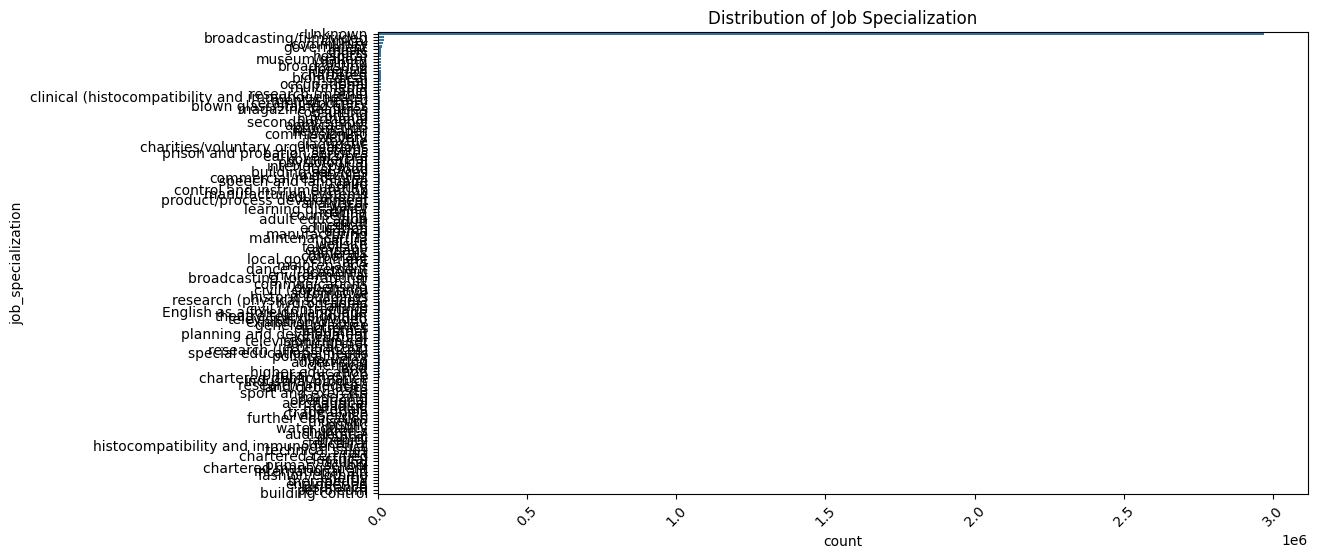

In [7]:
# Plot the distribution of job specialization
plt.figure(figsize=(12, 6))
sns.countplot(train['job_specialization'], order=train['job_specialization'].value_counts().index)
plt.xticks(rotation=45)
plt.title('Distribution of Job Specialization')
plt.show()

## Define Churn
- Churn is a business term that describes a customer who has stopped doing business with a company. Companies are very keen on measuring churn because keeping an existing customer is far less expensive than acquiring a new customer. New business involves working leads through a sales funnel, using marketing and sales budgets to gain additional customers. Existing customers will often have a higher volume of service consumption and can generate additional customer referrals.
- So here, we will create a churn definition based on customer behavior patterns and implement it as a binary target variable.

In [9]:
# Define churn and non-churn customers
churn = train[train['churn_due_to_fraud'] == True]
non_churn = train[train['churn_due_to_fraud'] == False]

## Outlier detection
- Outliers are extreme values that deviate from other observations on data , they may indicate a variability in a measurement, experimental errors or a novelty. In other words, an outlier is an observation that diverges from an overall pattern on a sample.
- In this notebook, we will use the Isolation Forest algorithm to detect outliers in the dataset.

In [ ]:
from sklearn.ensemble import IsolationForest
from sklearn.preprocessing import StandardScaler